The dataset I am working with has information regarding different airlines and statistics surrounding their flights such as delays, airports, and carriers. The source for this dataset is the CORGIS datset project and it has 24 variables and 4408 observations. What I am looking to explore is which delay factor contributes the most to total delay, as well as if total delays can become more predictable based off of the carrier and weather.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
airlines = pd.read_csv("airlines_CORGIS.csv")
airlines.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [5]:
airlines.isnull().sum()

,0
Airport.Code,0
Airport.Name,0
Time.Label,0
Time.Month,0
Time.Month Name,0
Time.Year,0
Statistics.# of Delays.Carrier,0
Statistics.# of Delays.Late Aircraft,0
Statistics.# of Delays.National Aviation System,0
Statistics.# of Delays.Security,0


In [6]:
list(airlines.columns)

['Airport.Code',
 'Airport.Name',
 'Time.Label',
 'Time.Month',
 'Time.Month Name',
 'Time.Year',
 'Statistics.# of Delays.Carrier',
 'Statistics.# of Delays.Late Aircraft',
 'Statistics.# of Delays.National Aviation System',
 'Statistics.# of Delays.Security',
 'Statistics.# of Delays.Weather',
 'Statistics.Carriers.Names',
 'Statistics.Carriers.Total',
 'Statistics.Flights.Cancelled',
 'Statistics.Flights.Delayed',
 'Statistics.Flights.Diverted',
 'Statistics.Flights.On Time',
 'Statistics.Flights.Total',
 'Statistics.Minutes Delayed.Carrier',
 'Statistics.Minutes Delayed.Late Aircraft',
 'Statistics.Minutes Delayed.National Aviation System',
 'Statistics.Minutes Delayed.Security',
 'Statistics.Minutes Delayed.Total',
 'Statistics.Minutes Delayed.Weather']

In [8]:
airlines = airlines.rename(columns={
    'Airport.Code': 'airport_code',
    'Airport.Name': 'airport_name',
    'Time.Label': 'time_label',
    'Time.Month': 'month',
    'Time.Month Name': 'month_name',
    'Time.Year': 'year',
    'Statistics.# of Delays.Carrier': 'delays_carrier',
    'Statistics.# of Delays.Late Aircraft': 'delays_late_aircraft',
    'Statistics.# of Delays.National Aviation System': 'delays_nas',
    'Statistics.# of Delays.Security': 'delays_security',
    'Statistics.# of Delays.Weather': 'delays_weather',
    'Statistics.Carriers.Names': 'carrier_names',
    'Statistics.Carriers.Total': 'carriers_total',
    'Statistics.Flights.Cancelled': 'flights_cancelled',
    'Statistics.Flights.Delayed': 'flights_delayed',
    'Statistics.Flights.Diverted': 'flights_diverted',
    'Statistics.Flights.On Time': 'flights_on_time',
    'Statistics.Flights.Total': 'flights_total',
    'Statistics.Minutes Delayed.Carrier': 'minutes_delayed_carrier',
    'Statistics.Minutes Delayed.Late Aircraft': 'minutes_delayed_late_aircraft',
    'Statistics.Minutes Delayed.National Aviation System': 'minutes_delayed_nas',
    'Statistics.Minutes Delayed.Security': 'minutes_delayed_security',
    'Statistics.Minutes Delayed.Total': 'minutes_delayed_total',
    'Statistics.Minutes Delayed.Weather': 'minutes_delayed_weather'
})

In [10]:
airlines.describe()

,month,year,delays_carrier,delays_late_aircraft,delays_nas,delays_security,delays_weather,carriers_total,flights_cancelled,flights_delayed,flights_diverted,flights_on_time,flights_total,minutes_delayed_carrier,minutes_delayed_late_aircraft,minutes_delayed_nas,minutes_delayed_security,minutes_delayed_total,minutes_delayed_weather
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.578947,2009.243421,574.632486,789.078947,954.580309,5.575544,78.216878,12.253403,213.558076,2402.000454,27.880898,9254.420826,11897.860254,35021.369782,49410.274955,45077.107985,211.769737,135997.535163,6276.982759
std,3.457890,3.667475,329.616475,561.798420,921.907801,6.007046,75.181726,2.289861,288.873477,1710.947613,36.356399,5337.214211,6861.691876,24327.721037,38750.017050,57636.745683,257.174789,113972.276370,6477.417169
min,1.000000,2003.000000,112.000000,86.000000,61.000000,-1.000000,1.000000,3.000000,3.000000,283.000000,0.000000,2003.000000,2533.000000,6016.000000,5121.000000,2183.000000,0.000000,14752.000000,46.000000
25%,4.000000,2006.000000,358.000000,425.000000,399.000000,2.000000,33.000000,11.000000,58.000000,1298.750000,8.000000,5708.750000,7400.000000,19530.750000,25084.250000,14389.000000,65.000000,65444.750000,2310.750000
50%,7.000000,2009.000000,476.000000,618.500000,667.500000,4.000000,58.000000,12.000000,123.000000,1899.000000,15.000000,7477.000000,9739.500000,27782.000000,37483.000000,25762.000000,141.000000,100711.000000,4298.500000
75%,10.000000,2012.000000,692.000000,959.000000,1166.000000,7.000000,98.000000,14.000000,250.000000,2950.000000,32.000000,10991.500000,13842.500000,41606.000000,59951.250000,50362.000000,274.000000,164294.750000,7846.000000
max,12.000000,2016.000000,3087.000000,4483.000000,9066.000000,94.000000,812.000000,18.000000,3680.000000,13699.000000,442.000000,31468.000000,38241.000000,220796.000000,345456.000000,602479.000000,4949.000000,989367.000000,76770.000000


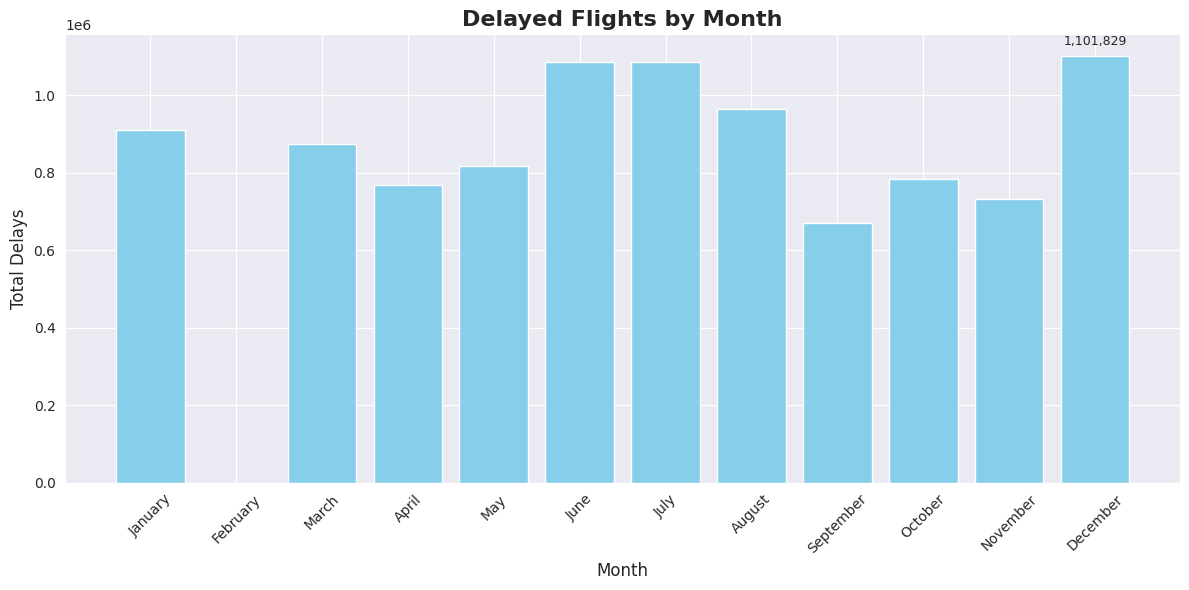

In [49]:

sns.set_style("darkgrid")

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
'July', 'August', 'September', 'October', 'November', 'December']

monthly_delays = airlines.groupby('month_name')['flights_delayed'].sum().reindex(month_order)

plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_delays.index, monthly_delays.values, color='skyblue')

plt.title('Delayed Flights by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Delays', fontsize=12)

plt.xticks(rotation=45)

for bar in bars:
 height = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, height + 20000, f'{int(height):,}',
ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

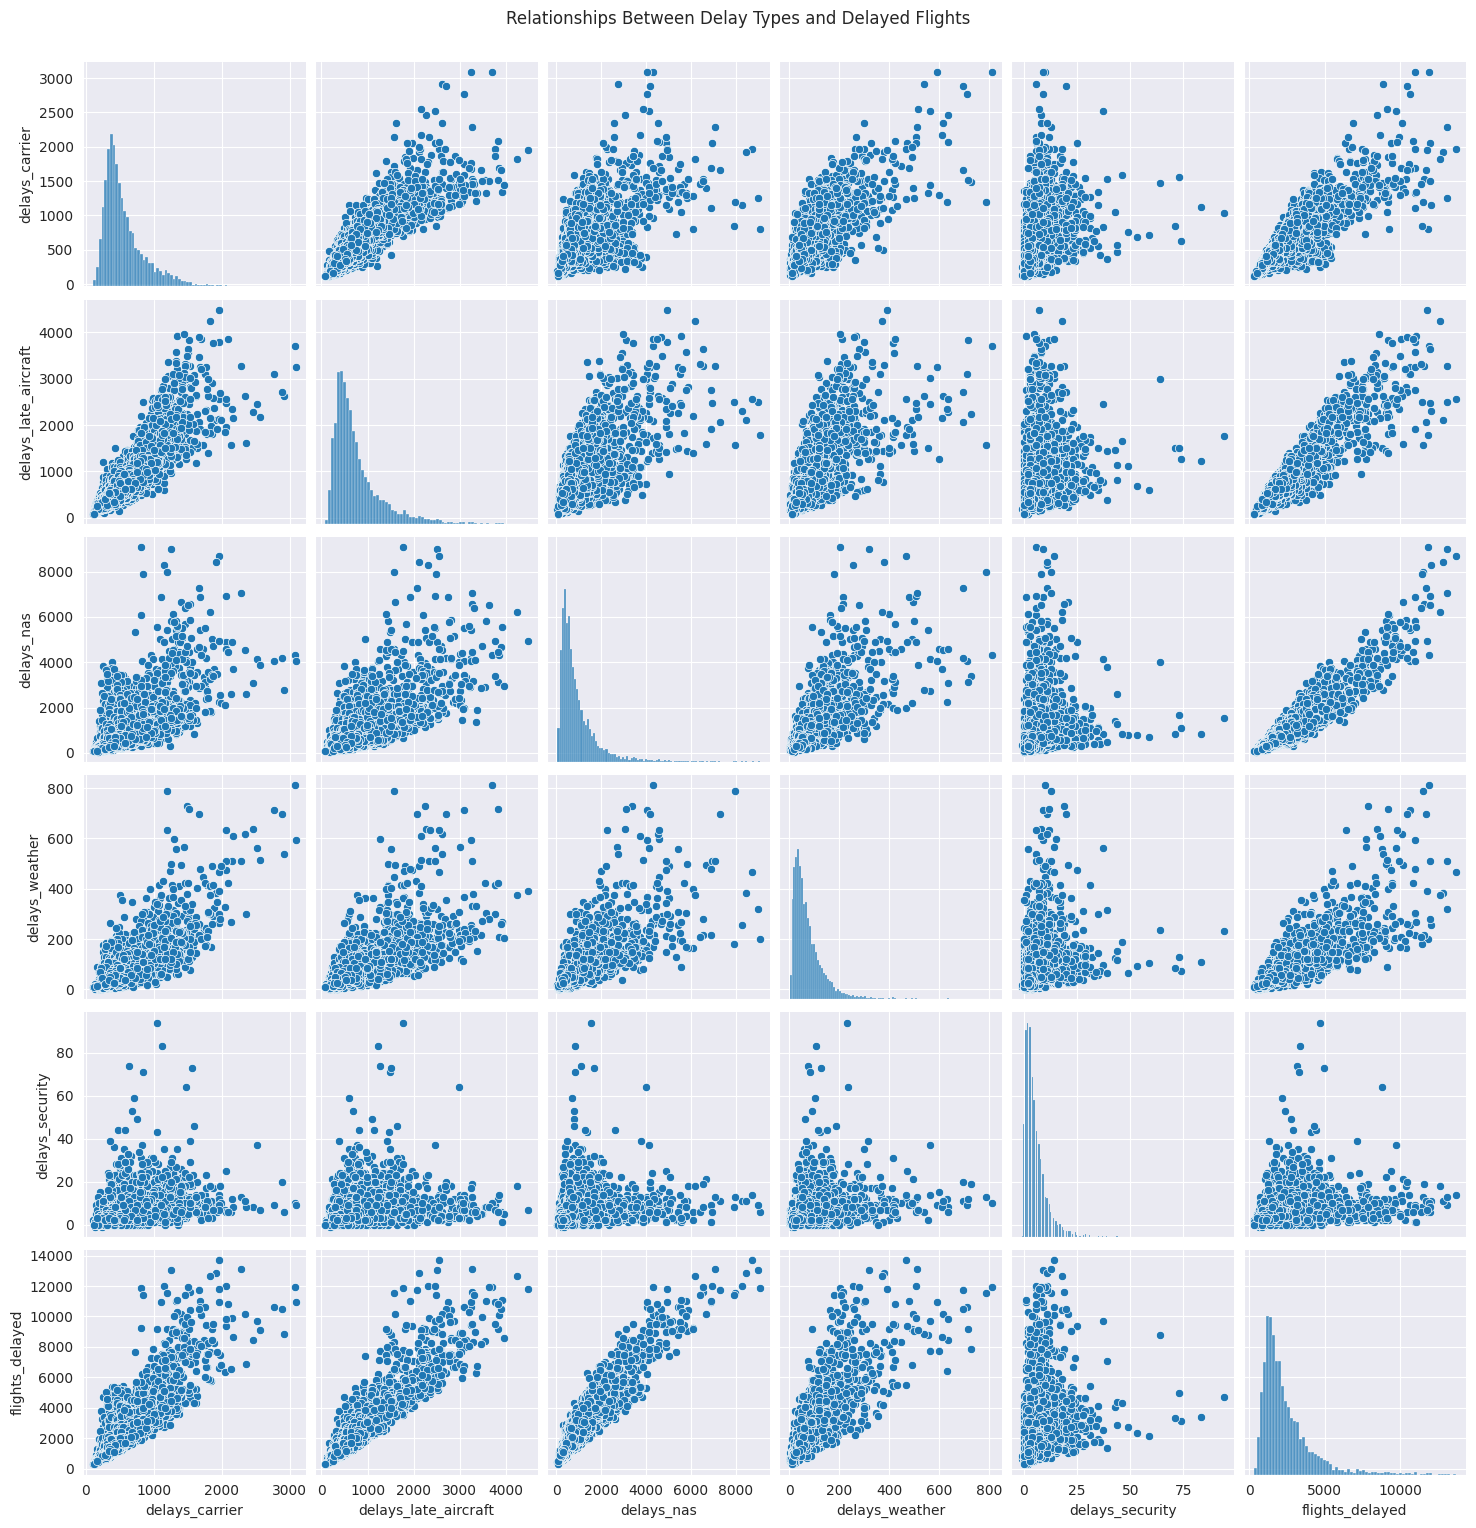

In [50]:
sns.pairplot(airlines[[
    'delays_carrier',
    'delays_late_aircraft',
    'delays_nas',
    'delays_weather',
    'delays_security',
    'flights_delayed'
]])
plt.suptitle('Relationships Between Delay Types and Delayed Flights', y=1.02)
plt.show()

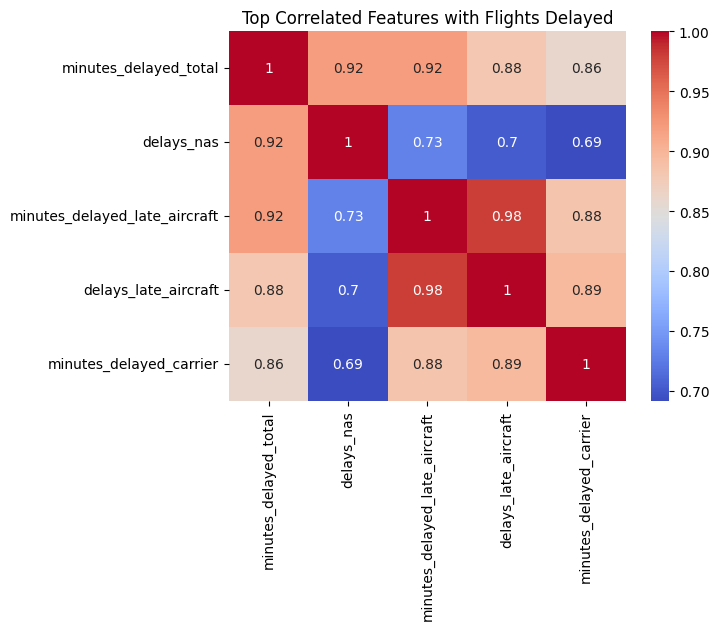

In [27]:
numeric_airlines = airlines.select_dtypes(include='number')

corr_matrix = numeric_airlines.corr()

target_corr = corr_matrix['flights_delayed'].sort_values(ascending=False)

top_corr_features = target_corr[1:6].index

sns.heatmap(numeric_airlines[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with Flights Delayed')
plt.show()

In [42]:
X = airlines[['delays_carrier', 'delays_weather', 'delays_nas', 'delays_late_aircraft', 'delays_security']]

y = airlines['minutes_delayed_total']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared: 0.955
MAE: 14410.58
RMSE: 24165.64


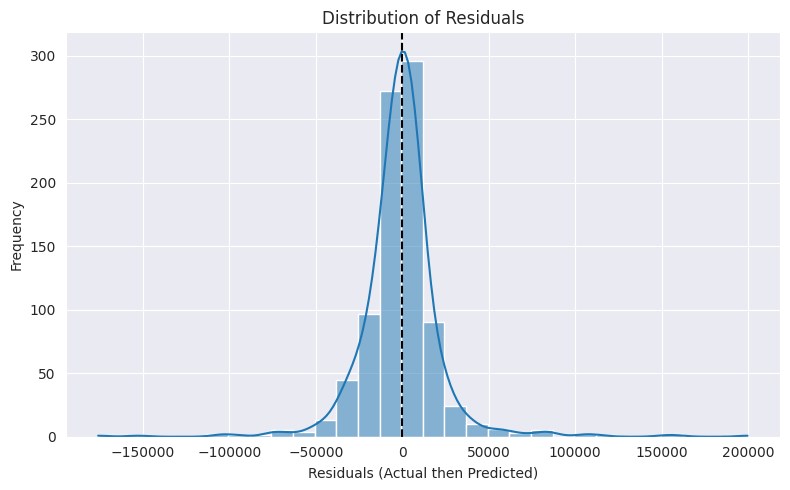

In [51]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual then Predicted)')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linestyle='dashed')
plt.tight_layout()
plt.show()

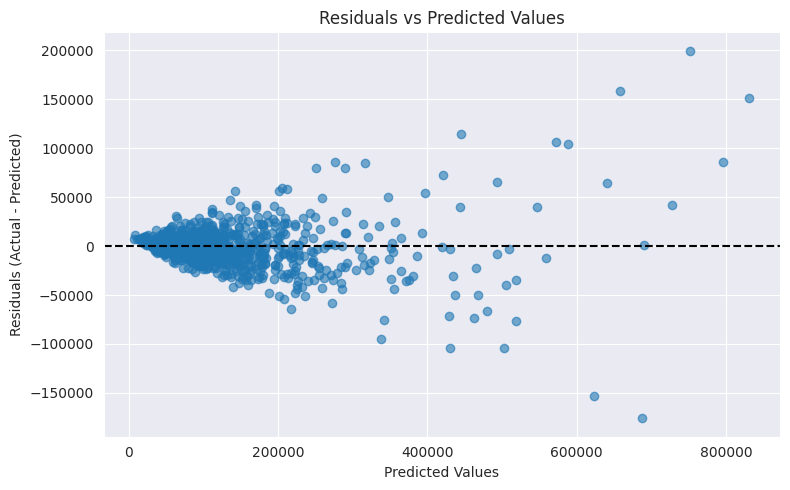

In [48]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='black', linestyle='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

In [53]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

delays_carrier: 7.48
delays_weather: 124.77
delays_nas: 68.65
delays_late_aircraft: 86.83
delays_security: -897.37


The linear regression model that I have created estimates how much each type of delay contributes to the total minutes delayed for flights. 7.5 minutes of delay (approximately) is added to the total delay from each carrier, however weather delays have the strongest positive impact at 126 minutes approximately. NAS delays and late aircraft delays contribbute 69 and 87 minutes of delay approximately which is very notable as well. However, security delays have an extremely strong negative impact that may be related to some anomalies within the data.